# Predicting Auto Insurance Pricing Using Telematics

## Business Understanding

Usage-Based Insurance (UBI) is a type of auto insurance that tracks mileage and driving behaviors. UBI is often powered by in-vehicle telecommunication devices (telematics)-technology that is available in a vehicle that is self-installed using a plug in-device or already integrated in original equipment installed by car manufactures. It can also be available through mobile applications. The basic idea of UBI is that a driver's behavior is monitored directly while the person drives, allowing insurers to more closely align driving behaviors with premium rates.

Telematics devices measure a number of elements of interest to underwriters: miles driven; time of day; where the vehicle is driven (Global Positioning System or GPS); rapid acceleration; 

The level of data collected generally reflects the type of telematics technology employed and the policyholders' willingness to share personal data. The insurance company then assesses the data and charges insurance premiums accordingly. For example, a driver who drives long distance at high speed will be charged a higher rate than a driver who drives short distances at slower speeds.

The use of telematics helps insurers more accurately estimate accident damages and reduce fraud by enabling them to analyze the driving data (such as hard braking, speed, and time) during an accident. This additional data can also be used by insurers to refine or differentiate UBI products. Additionally, the ancillary safety benefits offered in conjunction with many telematics-based UBI programs also help to lower accident and vehicle theft related costs by improving accident response time, allowing for stolen vehicles to be tracked and recovered, and monitoring driver safety. Telematics also allow fleets to determine the most efficient routes, saving them costs related to personnel, gas, and maintenance.

## What is our aim?

In this notebook, I will be analyzing the telematics data to identify which factors are most essential in determining the auto-insurance price for a customer. The next step will be to create a machine learning algorithm which correctly predicts the auto-insurance price, given that other details of the vehicle and driver are known. 

### Potential use cases

* Improved customer segmentation
* Personalized driving feedback
* Safe driving rewards
* Auto insurance savings
* Increased customer lifetime value
* Reducing the customer churn rate

## Understanding the data

The practice of tracking mileage and behavior information in Usage Based Insurance (UBI) programs has raised privacy concerns. As a result, some states have enacted legislation requiring disclosure of tracking practices and devices. Additionally, some insurers limit the data they collect. 

Implementing a UBI program, particularly one that utilizes telematics, can be costly and resource intensive to the insurer. UBI programs rely heavily on costly technology to capture and sensitize driving data. This is the reason why any real world datasets aren't available for public use at this moment.

So, in order to solve the business problem, I created a custom dataset which draws inspiration from a research paper on Predicting Motor Insurance Claims Using Telematics Data (https://www.mdpi.com/2227-9091/7/2/70/htm). The authors of this paper focus on a classiciation problem to predict whether a driver will file for claims in the next year or not. The descriptive statistics of the data which they used (in Table 1 of the paper), helped me identify the types of data I should be focussing on for the problem I look to solve.

Drawing inspiration from these values and learning about the average auto-insurance prices, demographic distribution of drivers, and claims made by policyholders, I created a dataset comprising of **5503 rows** and **12 columns**. The features included in the dataset are described as follows:

* CustID: A unique identifier for each customer in the data
* Age: Age of the customer 
* Gender: Gender of the customer
* Driving experience: The number of years the customer has been driving, it is usually a number between 0 and the current age of the customer - 18 (legal driving age)
* Age of vehicle: The number of years ago the vehicle was manufactured 
* Type of vehicle: What type of car does the customer currently drive
* Total KMs traveled: How many kilometers has the customer driven this car? 
* Percentage of travel in urban areas: How often does the customer drive in urban areas? 
* Percent of travel above speed limit: How often does the customer overspeed? 
* Percent of travel at night: How often does the customer drive at night? 
* Claim: Did the customer claim their insurance in the past year?
* Price: What is the price of their auto-insurance? 


Here **Price will be our target variable** and all others are independent variables.

Let's get started to first see how our data looks like and then study how these independent variables impact our target variable.

#### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#### Read the data file

In [2]:
data = pd.read_excel('Data.xlsx')

In [3]:
data.head()

,CustID,Age,Gender,Driving Exp,Age of vehicle,Type of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Price
0,C001,31,Female,11,2,Compact,34904,52,11,0,0,1652
1,C002,48,Male,20,1,Sports,6623,25,6,3,0,1552
2,C003,19,Female,1,3,SUV,25143,22,12,7,0,1430
3,C004,28,Female,7,5,Coupe,8303,39,3,3,0,1491
4,C005,48,Male,3,6,Convertible,22340,58,12,3,0,1898


#### Summary Statisitics



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5503 entries, 0 to 5502
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   CustID                               5503 non-null   object
 1   Age                                  5503 non-null   int64 
 2   Gender                               5503 non-null   object
 3   Driving Exp                          5503 non-null   int64 
 4   Age of vehicle                       5503 non-null   int64 
 5   Type of vehicle                      5503 non-null   object
 6   Total KMs traveled                   5503 non-null   int64 
 7   Percentage of travel in urban areas  5503 non-null   int64 
 8   Percent of travel above speed limit  5503 non-null   int64 
 9   Percent of travel at night           5503 non-null   int64 
 10  Claim                                5503 non-null   int64 
 11  Price                                5503 n

Checking if there are any null values in any columns

In [5]:
data.isnull().sum()

CustID                                 0
Age                                    0
Gender                                 0
Driving Exp                            0
Age of vehicle                         0
Type of vehicle                        0
Total KMs traveled                     0
Percentage of travel in urban areas    0
Percent of travel above speed limit    0
Percent of travel at night             0
Claim                                  0
Price                                  0
dtype: int64

Checking the distribution of data

In [6]:
data.mean()

Age                                       36.514265
Driving Exp                                9.269126
Age of vehicle                             7.536071
Total KMs traveled                     21215.775395
Percentage of travel in urban areas       47.322370
Percent of travel above speed limit        6.037252
Percent of travel at night                 6.107941
Claim                                      0.083409
Price                                   1656.950209
dtype: float64

In [7]:
data.std()

Age                                      11.038206
Driving Exp                               8.471244
Age of vehicle                            4.627816
Total KMs traveled                     8464.008434
Percentage of travel in urban areas      18.336519
Percent of travel above speed limit       3.749891
Percent of travel at night                3.715576
Claim                                     0.276525
Price                                   149.950931
dtype: float64

### Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

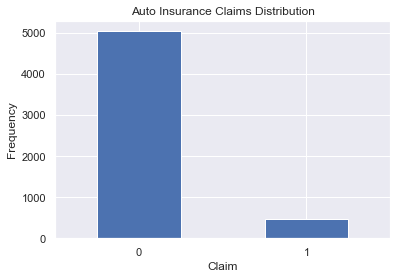

In [8]:
count_claim = pd.value_counts(data['Claim'], sort = True)
count_claim.plot(kind = 'bar', rot=0)
plt.title("Auto Insurance Claims Distribution")
plt.xlabel("Claim")
plt.ylabel("Frequency")

In [9]:
## Get the claimed and the nonclaimed dataset 
claimed = data[data['Claim']==1]
nclaimed = data[data['Claim']==0]

In [10]:
print(claimed.shape,nclaimed.shape)

(459, 12) (5044, 12)


In [11]:
## We need to analyze more amount of information from the data
#How different are the data points in both the categories classes?
claimed.describe()

,Age,Driving Exp,Age of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Price
count,459.000000,459.00000,459.000000,459.000000,459.000000,459.000000,459.000000,459.0,459.000000
mean,35.379085,8.80610,7.320261,20847.021786,47.368192,6.169935,6.224401,1.0,1750.949891
std,11.174483,8.54576,4.786243,8460.705873,18.115036,3.716112,3.666170,0.0,224.868141
min,18.000000,0.00000,0.000000,222.000000,16.000000,0.000000,0.000000,1.0,1402.000000
25%,26.000000,2.00000,3.000000,15066.000000,32.000000,3.000000,3.000000,1.0,1549.000000
50%,34.000000,6.00000,7.000000,21617.000000,46.000000,6.000000,6.000000,1.0,1696.000000
75%,46.000000,14.00000,12.000000,27751.500000,63.000000,9.000000,9.000000,1.0,1958.000000
max,55.000000,35.00000,15.000000,34836.000000,79.000000,12.000000,12.000000,1.0,2166.000000


In [12]:
nclaimed.describe()

,Age,Driving Exp,Age of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Price
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.0,5044.000000
mean,36.617565,9.311261,7.555710,21249.331681,47.318200,6.025178,6.097343,0.0,1648.396312
std,11.021038,8.464028,4.613118,8464.349834,18.358312,3.753082,3.720217,0.0,138.065569
min,18.000000,0.000000,0.000000,204.000000,16.000000,0.000000,0.000000,0.0,1400.000000
25%,27.000000,2.000000,4.000000,14860.750000,32.000000,3.000000,3.000000,0.0,1534.750000
50%,37.000000,7.000000,8.000000,21689.500000,47.000000,6.000000,6.000000,0.0,1657.000000
75%,46.000000,14.000000,12.000000,28506.750000,63.000000,9.000000,9.000000,0.0,1753.000000
max,55.000000,37.000000,15.000000,34994.000000,79.000000,12.000000,12.000000,0.0,1900.000000


In [13]:
#Determine the number of claimed and non-claimed transactions in the dataset

Claimed = data[data['Claim']==1]
NonClaimed = data[data['Claim']==0]
outlier_fraction = len(Claimed)/float(len(NonClaimed))

In [14]:
print(outlier_fraction)
print("Claimed Cases : {}".format(len(Claimed)))
print("Non Claimed Cases : {}".format(len(NonClaimed)))

0.09099920697858842
Claimed Cases : 459
Non Claimed Cases : 5044


9% of the policyholders filed for auto-insurance claims in the last year

Text(0, 0.5, 'Frequency')

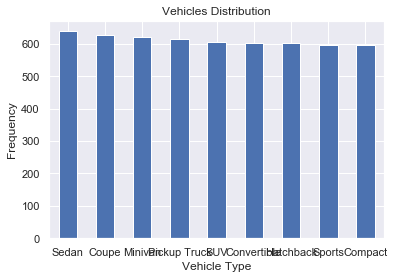

In [15]:
count_vehicles = pd.value_counts(data['Type of vehicle'], sort = True)
count_vehicles.plot(kind = 'bar', rot=0)

plt.title("Vehicles Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Frequency")

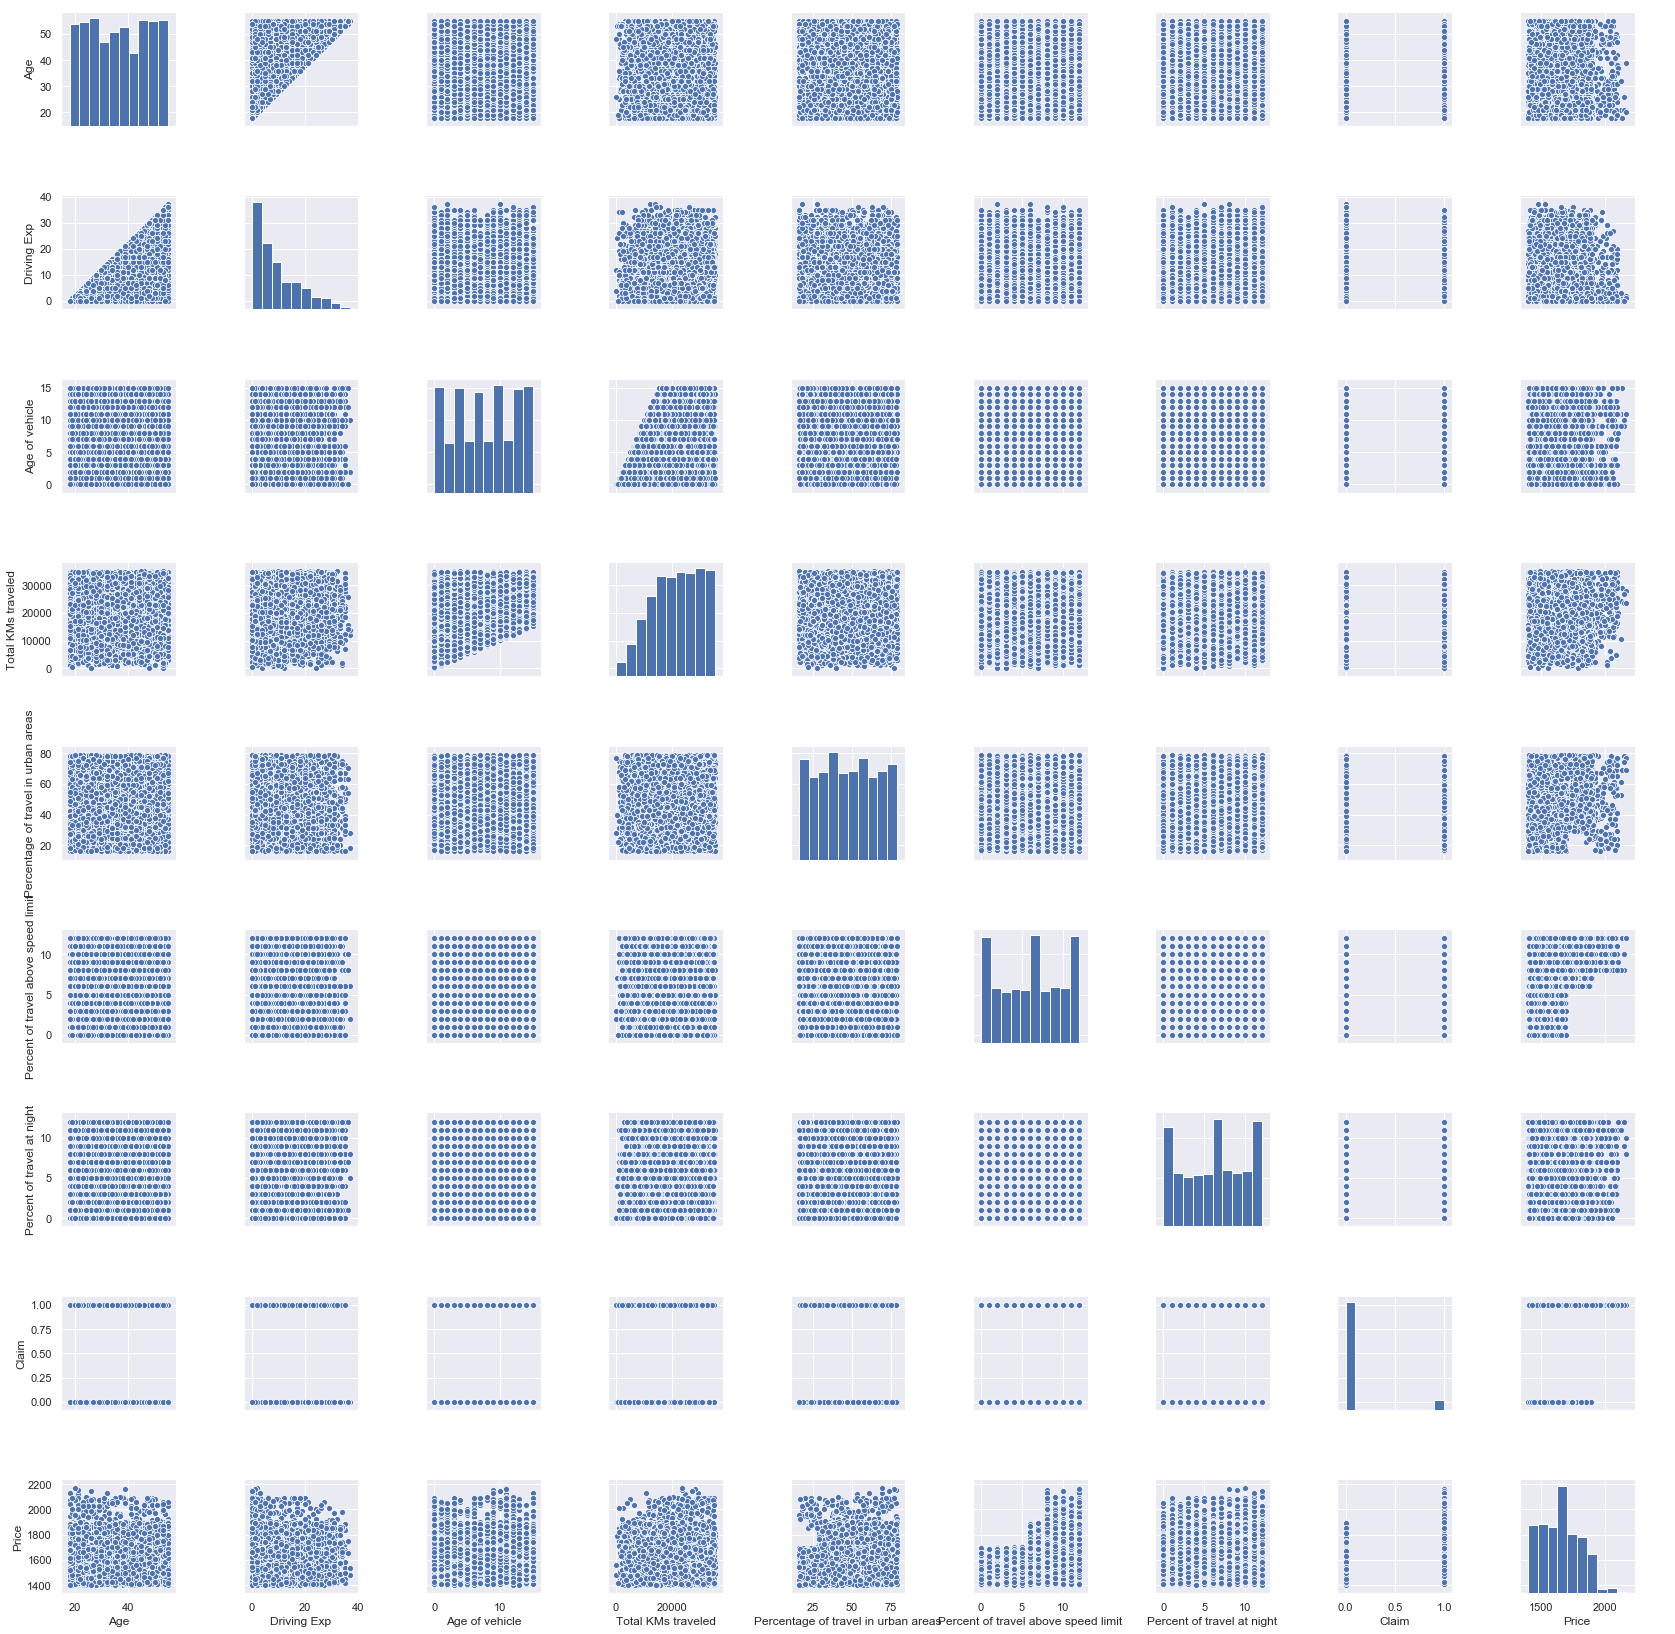

In [16]:
sns.pairplot(data)

The independent variables look very unifromly distributed with respect to the target variable in most cases. 

#### Handling categorical data

In [17]:
data["Type of vehicle"].value_counts()

Sedan           639
Coupe           628
Minivan         621
Pickup Truck    614
SUV             606
Convertible     601
Hatchback       601
Sports          597
Compact         596
Name: Type of vehicle, dtype: int64

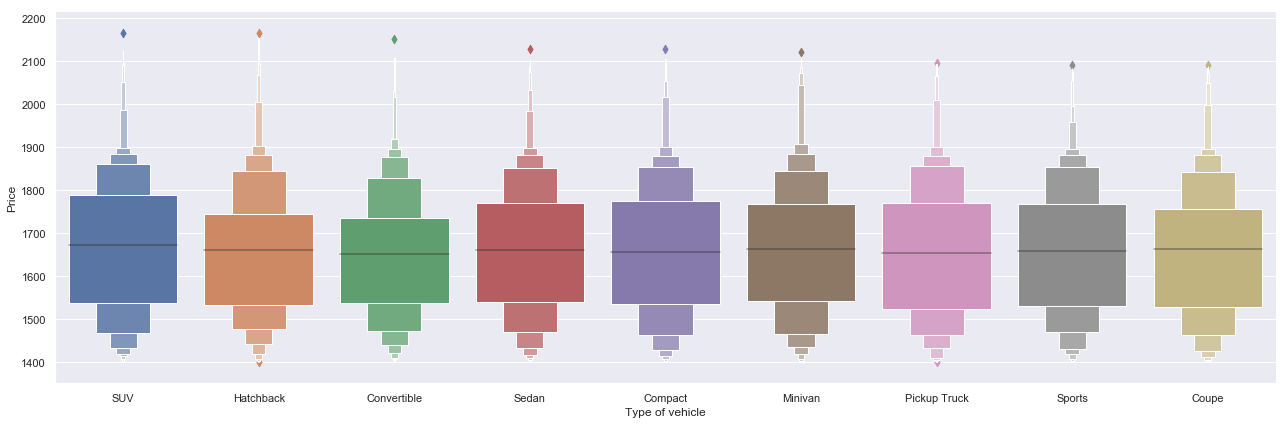

In [18]:
sns.catplot(y= "Price", x= "Type of vehicle", data=data.sort_values("Price", ascending=False), kind="boxen", height = 6, aspect = 3)

plt.show()

#### Using OneHot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [19]:
CType = data["Type of vehicle"]
CType = pd.get_dummies(CType, drop_first=True)
CType.head()

,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV,Sedan,Sports
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


Text(0, 0.5, 'Frequency')

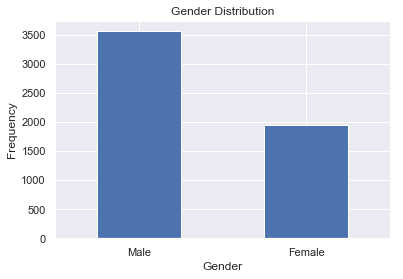

In [20]:
count_gen = pd.value_counts(data['Gender'], sort = True)
count_gen.plot(kind = 'bar', rot=0)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")

In [21]:
data["Gender"].value_counts()

Male      3557
Female    1946
Name: Gender, dtype: int64

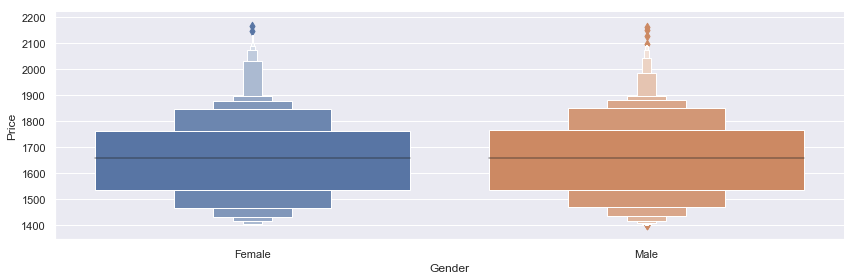

In [22]:
sns.catplot(y = "Price", x = "Gender", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [23]:
Gender = data["Gender"]
Gender = pd.get_dummies(Gender, drop_first= True)

Gender.head()

,Male
0,0
1,1
2,0
3,0
4,1


Since "CustID" is just a unique identifier for each customer in this dataset, it will not have any impact on the analysis. Hence, it can be dropped from the dataset.

In [24]:
data.drop(["CustID"], axis = 1, inplace=True)

In [25]:
data.head()

,Age,Gender,Driving Exp,Age of vehicle,Type of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Price
0,31,Female,11,2,Compact,34904,52,11,0,0,1652
1,48,Male,20,1,Sports,6623,25,6,3,0,1552
2,19,Female,1,3,SUV,25143,22,12,7,0,1430
3,28,Female,7,5,Coupe,8303,39,3,3,0,1491
4,48,Male,3,6,Convertible,22340,58,12,3,0,1898


Add the newly created columns using onehot encoding to the existing dataset

In [26]:
df = pd.concat([data, CType, Gender], axis = 1)

In [27]:
df.head()

,Age,Gender,Driving Exp,Age of vehicle,Type of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Price,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV,Sedan,Sports,Male
0,31,Female,11,2,Compact,34904,52,11,0,0,1652,0,0,0,0,0,0,0,0,0
1,48,Male,20,1,Sports,6623,25,6,3,0,1552,0,0,0,0,0,0,0,1,1
2,19,Female,1,3,SUV,25143,22,12,7,0,1430,0,0,0,0,0,1,0,0,0
3,28,Female,7,5,Coupe,8303,39,3,3,0,1491,0,1,0,0,0,0,0,0,0
4,48,Male,3,6,Convertible,22340,58,12,3,0,1898,1,0,0,0,0,0,0,0,1


The "Type of vehicle" and "Gender" columns can now be removed from the dataset as the newly added columns take these values into consideration.

In [28]:
df.drop(["Type of vehicle", "Gender"], axis = 1, inplace=True)

In [29]:
df.head()

,Age,Driving Exp,Age of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Price,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV,Sedan,Sports,Male
0,31,11,2,34904,52,11,0,0,1652,0,0,0,0,0,0,0,0,0
1,48,20,1,6623,25,6,3,0,1552,0,0,0,0,0,0,0,1,1
2,19,1,3,25143,22,12,7,0,1430,0,0,0,0,0,1,0,0,0
3,28,7,5,8303,39,3,3,0,1491,0,1,0,0,0,0,0,0,0
4,48,3,6,22340,58,12,3,0,1898,1,0,0,0,0,0,0,0,1


In [30]:
df.shape

(5503, 18)

In [31]:
df.columns

Index(['Age', 'Driving Exp', 'Age of vehicle', 'Total KMs traveled',
       'Percentage of travel in urban areas',
       'Percent of travel above speed limit', 'Percent of travel at night',
       'Claim', 'Price', 'Convertible', 'Coupe', 'Hatchback', 'Minivan',
       'Pickup Truck', 'SUV', 'Sedan', 'Sports', 'Male'],
      dtype='object')

#### Segregating the independent and target variables

In [32]:
X = df.loc[:, ['Age', 'Driving Exp', 'Age of vehicle', 'Total KMs traveled',
       'Percentage of travel in urban areas',
       'Percent of travel above speed limit', 'Percent of travel at night', 'Claim',
         'Convertible', 'Coupe', 'Hatchback', 'Minivan',
       'Pickup Truck', 'SUV', 'Sedan', 'Sports', 'Male']]

X.head()

,Age,Driving Exp,Age of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV,Sedan,Sports,Male
0,31,11,2,34904,52,11,0,0,0,0,0,0,0,0,0,0,0
1,48,20,1,6623,25,6,3,0,0,0,0,0,0,0,0,1,1
2,19,1,3,25143,22,12,7,0,0,0,0,0,0,1,0,0,0
3,28,7,5,8303,39,3,3,0,0,1,0,0,0,0,0,0,0
4,48,3,6,22340,58,12,3,0,1,0,0,0,0,0,0,0,1


In [33]:
y = df.iloc[:, 8]
y.head()

0    1652
1    1552
2    1430
3    1491
4    1898
Name: Price, dtype: int64

##### Finding correlation between attributes


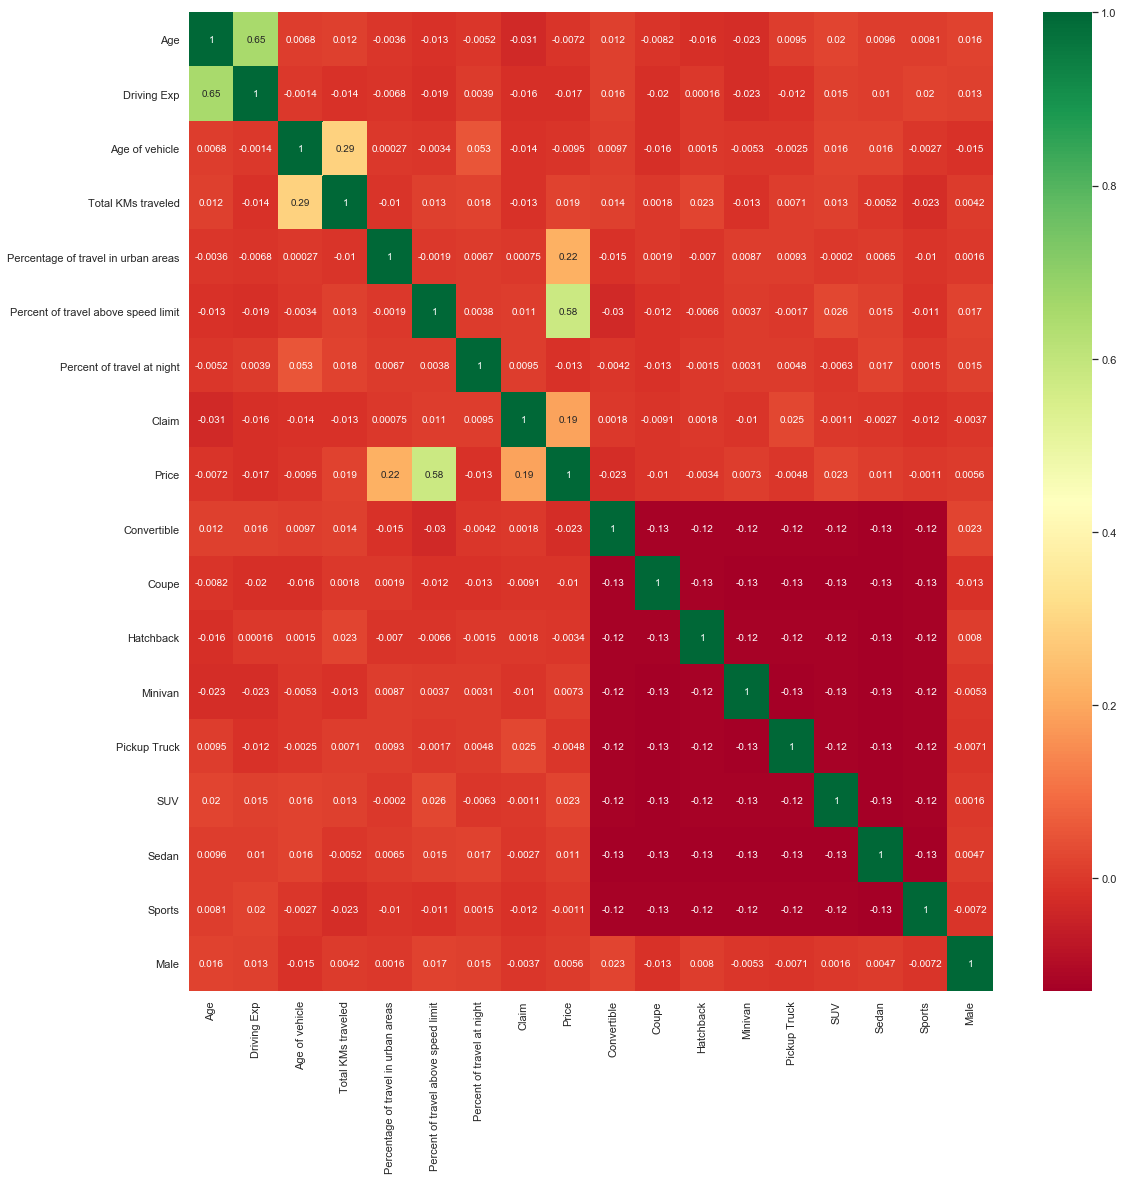

In [34]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [35]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
print(selection.feature_importances_)

[0.03455375 0.03475811 0.03525337 0.03651506 0.20003368 0.48514714
 0.03461407 0.07546788 0.00518031 0.00673462 0.00540241 0.00638024
 0.00618716 0.00628037 0.00589129 0.00750653 0.01409396]


##### Plotting graph of feature importances for better visualization


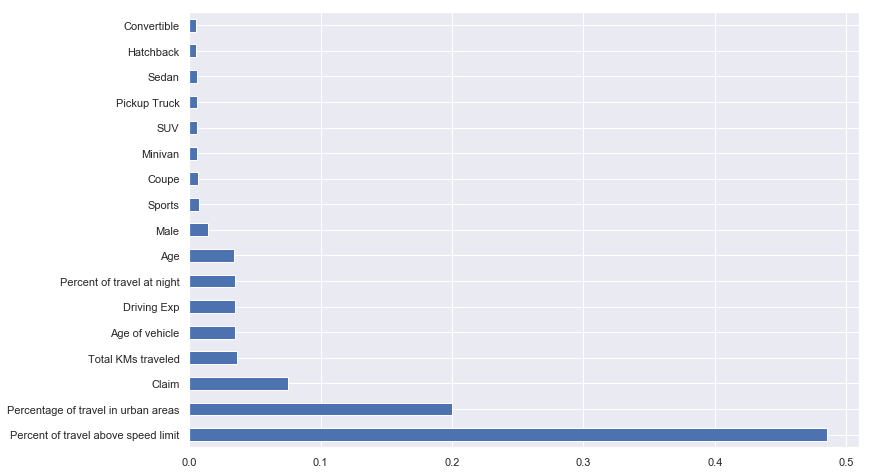

In [37]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

Creating a new split (X1) which consists of the variables that impact the insurance price the most. I will use it for further analysis later to compare the performance of all models with the ones that consist all independent variables (X).

In [38]:
X1 = df.loc[:, ['Age', 'Driving Exp', 'Age of vehicle', 'Total KMs traveled',
       'Percentage of travel in urban areas',
       'Percent of travel above speed limit', 'Percent of travel at night', 'Claim',
         'Male']]

X1.head()

,Age,Driving Exp,Age of vehicle,Total KMs traveled,Percentage of travel in urban areas,Percent of travel above speed limit,Percent of travel at night,Claim,Male
0,31,11,2,34904,52,11,0,0,0
1,48,20,1,6623,25,6,3,0,1
2,19,1,3,25143,22,12,7,0,0
3,28,7,5,8303,39,3,3,0,0
4,48,3,6,22340,58,12,3,0,1


### Predictive Modeling

#### Splitting the data into train and test sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
model.score(X_train, y_train)

0.42280229205534947

In [43]:
model.score(X_test, y_test)

0.4037338892823217

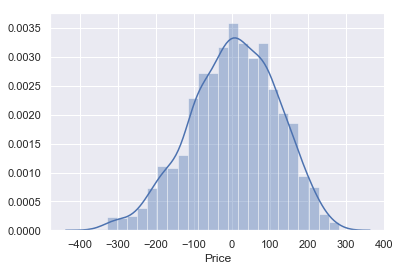

In [44]:
sns.distplot(y_test-y_pred)
plt.show()

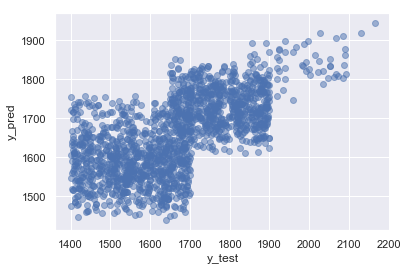

In [45]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Although we can see that the data tends to follow a linear path, but there is too much noise for us to be certain 

In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 92.15230305874553
MSE: 13019.368515040724
RMSE: 114.10244745420987


In [47]:
metrics.r2_score(y_test, y_pred)

0.4037338892823217

#### Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
y_pred = reg_rf.predict(X_test)

In [50]:
reg_rf.score(X_train, y_train)

0.9557773579628339

In [51]:
reg_rf.score(X_test, y_test)

0.681811532260445

The performance of the model has improved from the linear regression results, there however remains scope of improvement, which I will further look into.

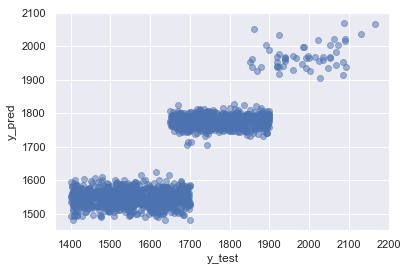

In [52]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

The next step should be to aim to reduce the noise and develop a model with more uniform predictions.

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 71.15930950938825
MSE: 6947.590755663235
RMSE: 83.35220906288708


In [54]:
metrics.r2_score(y_test, y_pred)

0.681811532260445

In [55]:
##import xgboost
##from xgboost import XGBClassifier

In [56]:
##model1 = XGBClassifier()

In [57]:
##model1.fit(X_train, y_train)

In [58]:
##y_pred = model1.predict(X_test)

In [59]:
##model1.score(X_train, y_train)

In [60]:
##model1.score(X_test, y_test)

  #### Experimenting with the X1 split, which I had created earlier

In [61]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 1)

In [62]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X1_train, y_train)

LinearRegression()

In [63]:
y_pred = model2.predict(X1_test)

In [64]:
model2.score(X1_train, y_train)

0.4111741261626427

In [65]:
model2.score(X1_test, y_test)

0.4322576574370035

For the X1 split, we see a slight improvement in performance. 

In [66]:
from sklearn.ensemble import RandomForestRegressor
reg_rf2 = RandomForestRegressor()


RandomForestRegressor()

In [70]:
reg_rf2.fit(X1_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = reg_rf2.predict(X1_test)

In [72]:
reg_rf2.score(X1_train, y_train)

0.9550651724385858

In [73]:
reg_rf2.score(X1_test, y_test)

0.6908873303013854

Again for the X1 split for the random forest model, there is a slight improvement in performance. Now that I have eliminated all the "extra" variables, in the next steps I shall try optimizing the variables to include by selecting only the variables that are of high significance in the predictions.

Also I would like to check the performance on XGBoost and SVM Regression models and compare it to the performance of the Random Forest Model.

It would also be beneficial to have information such as the credit score, geographical region, waether conditions, and vehicle price of the customer as they are important determinants in deciding what the auto-insurance price must be.